In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map

In [2]:
random_map = generate_random_map(size=10, p=0.3)
env = gym.make("FrozenLake-v1",is_slippery=True, desc=random_map)
env.seed(0)  # make results reproducible

[0]

4 100


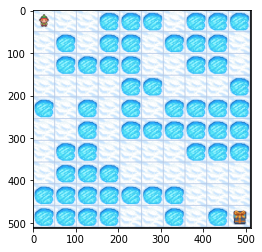

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print(action_space_size, state_space_size)
plt.figure(3)
plt.clf()
env.reset()
plt.imshow(env.render("rgb_array"))
time.sleep(0.3)

In [4]:
def plot_epsilon(epsilon, num_episodes):
    steps = np.arange(0, num_episodes, 1)
    plt.clf()
    plt.plot(steps, epsilon, marker="o", markersize=1)
    plt.ylabel("Epsilon ")
    plt.xlabel("Step")
    plt.tight_layout()
    plt.show()

In [5]:
def plot_rewards(rewards, episodes):
    # Plot reward per 1000 episodes
    # Line plot to show how average reward changes over time
    average_rewards = np.split(np.array(rewards), episodes/1000)
    steps = 1000 * np.arange(len(average_rewards))
    plt.clf()
    plt.plot(steps, np.average(average_rewards, 1))
    plt.ylabel("Average Reward")
    plt.xlabel("Episode")
    plt.tight_layout()
    plt.show()

# Agent not knowing about the reward at the right most corner

In [6]:
total_episodes = 3000000
learning_rate = 0.8  
max_steps = 800
gamma = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000005
q_table = np.zeros((state_space_size, action_space_size))

Score over time: 0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0.

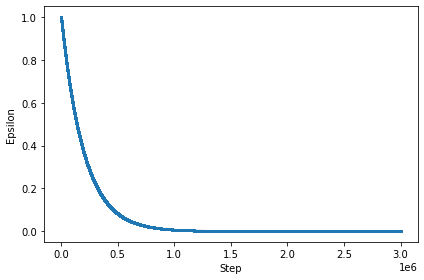

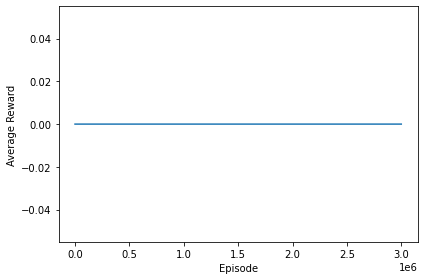

Avg reward per 1000 episode 

1000 :  0.0
2000 :  0.0
3000 :  0.0
4000 :  0.0
5000 :  0.0
6000 :  0.0
7000 :  0.0
8000 :  0.0
9000 :  0.0
10000 :  0.0
11000 :  0.0
12000 :  0.0
13000 :  0.0
14000 :  0.0
15000 :  0.0
16000 :  0.0
17000 :  0.0
18000 :  0.0
19000 :  0.0
20000 :  0.0
21000 :  0.0
22000 :  0.0
23000 :  0.0
24000 :  0.0
25000 :  0.0
26000 :  0.0
27000 :  0.0
28000 :  0.0
29000 :  0.0
30000 :  0.0
31000 :  0.0
32000 :  0.0
33000 :  0.0
34000 :  0.0
35000 :  0.0
36000 :  0.0
37000 :  0.0
38000 :  0.0
39000 :  0.0
40000 :  0.0
41000 :  0.0
42000 :  0.0
43000 :  0.0
44000 :  0.0
45000 :  0.0
46000 :  0.0
47000 :  0.0
48000 :  0.0
49000 :  0.0
50000 :  0.0
51000 :  0.0
52000 :  0.0
53000 :  0.0
54000 :  0.0
55000 :  0.0
56000 :  0.0
57000 :  0.0
58000 :  0.0
59000 :  0.0
60000 :  0.0
61000 :  0.0
62000 :  0.0
63000 :  0.0
64000 :  0.0
65000 :  0.0
66000 :  0.0
67000 :  0.0
68000 :  0.0
69000 :  0.0
70000 :  0.0
71000 :  0.0
72000 :  0.0
73000 :  0.0
74000 :  0.0
75000 :  0.0
7600

In [7]:
rewards = []
exploration_rate_tracker = []

for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)
        temp_reward = reward

        q_table[state, action] = q_table[state, action] + learning_rate * (temp_reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        
        total_rewards += reward
        state = new_state
        
        if done == True: 
            break
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    exploration_rate_tracker.append(epsilon)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(q_table)

plot_epsilon(exploration_rate_tracker, total_episodes)
plot_rewards(rewards, total_episodes)

rewards_per_thousand_episodes = np.split(np.array(rewards), total_episodes/1000)
count = 1000
print("Avg reward per 1000 episode \n")
for r in rewards_per_thousand_episodes:
  print(count, ": ", str(sum(r/1000)))
  count += 1000

print("Q table\n")
print(q_table)

# Agent knowing about the reward at the right most corner

In [8]:
# Values of hyperparameters for 10
total_episodes = 3000000
learning_rate = 0.8  
max_steps = 800
gamma = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000005
q_table = np.zeros((state_space_size, action_space_size))

Score over time: 0.00011766666666666666
[[2.59857091e-01 8.81471535e-02 6.79265912e-02 5.53600300e-02]
 [4.11953143e-02 4.45509544e-02 4.11030370e-02 4.09923071e-02]
 [7.94761584e-02 1.91213021e-02 2.02596638e-02 1.96593690e-02]
 [9.00000000e-03 1.50000000e-02 1.20000000e-02 9.00000000e-03]
 [1.20000000e-02 2.00000000e-02 1.60000000e-02 1.20000000e-02]
 [1.50000000e-02 2.50000000e-02 2.00000000e-02 1.50000000e-02]
 [1.80000000e-02 3.00000000e-02 2.40000000e-02 1.80000000e-02]
 [2.10000000e-02 3.50000000e-02 2.80000000e-02 2.10000000e-02]
 [2.40000000e-02 4.00000000e-02 3.20000000e-02 2.40000000e-02]
 [2.70000000e-02 4.50000000e-02 3.60000000e-02 2.70000000e-02]
 [3.15718284e-01 8.93295887e-02 9.13887058e-02 4.75667777e-02]
 [3.30000000e-02 5.50000000e-02 4.40000000e-02 3.30000000e-02]
 [4.22719704e-02 4.27245608e-02 8.14389807e-02 4.13121929e-02]
 [3.90000000e-02 6.50000000e-02 5.20000000e-02 3.90000000e-02]
 [4.20000000e-02 7.00000000e-02 5.60000000e-02 4.20000000e-02]
 [4.50000000e-0

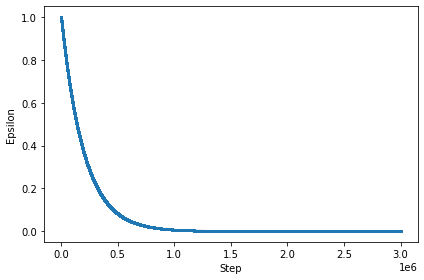

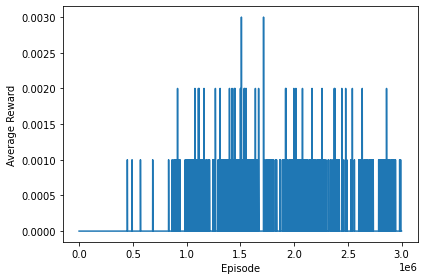

Avg reward per 1000 episode 

1000 :  0.0
2000 :  0.0
3000 :  0.0
4000 :  0.0
5000 :  0.0
6000 :  0.0
7000 :  0.0
8000 :  0.0
9000 :  0.0
10000 :  0.0
11000 :  0.0
12000 :  0.0
13000 :  0.0
14000 :  0.0
15000 :  0.0
16000 :  0.0
17000 :  0.0
18000 :  0.0
19000 :  0.0
20000 :  0.0
21000 :  0.0
22000 :  0.0
23000 :  0.0
24000 :  0.0
25000 :  0.0
26000 :  0.0
27000 :  0.0
28000 :  0.0
29000 :  0.0
30000 :  0.0
31000 :  0.0
32000 :  0.0
33000 :  0.0
34000 :  0.0
35000 :  0.0
36000 :  0.0
37000 :  0.0
38000 :  0.0
39000 :  0.0
40000 :  0.0
41000 :  0.0
42000 :  0.0
43000 :  0.0
44000 :  0.0
45000 :  0.0
46000 :  0.0
47000 :  0.0
48000 :  0.0
49000 :  0.0
50000 :  0.0
51000 :  0.0
52000 :  0.0
53000 :  0.0
54000 :  0.0
55000 :  0.0
56000 :  0.0
57000 :  0.0
58000 :  0.0
59000 :  0.0
60000 :  0.0
61000 :  0.0
62000 :  0.0
63000 :  0.0
64000 :  0.0
65000 :  0.0
66000 :  0.0
67000 :  0.0
68000 :  0.0
69000 :  0.0
70000 :  0.0
71000 :  0.0
72000 :  0.0
73000 :  0.0
74000 :  0.0
75000 :  0.0
7600

In [9]:
rewards = []
exploration_rate_tracker = []
# Let agent know that goal is in the right most corner
# Populate q table with ascending values to the goal
for i in range(0, state_space_size):
    for j in range(0, action_space_size):
        # give second index the highest value to encourage agent to go down
        if j == 1:
            q_table[i][j] = 0.5 * i / 100
        # give third index the second highest value to encourage agent to go right
        if j == 2:
            q_table[i][j] = 0.4 * i / 100
        # give the other two actions the lowest value to discourage agent from going up or left (This will be overwritten by the random initialization)
        if j == 0:
            q_table[i][j] = 0.3 * i / 100
        if j == 3:
            q_table[i][j] = 0.3 * i / 100

for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
        if exp_exp_tradeoff > epsilon:
            # action = np.argmax(q_table[state,:])
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)
        temp_reward = reward
        if not done and reward == 0.0 and new_state != state:
            temp_reward = 0.1 * new_state/100
        if done and reward == 0.0:
            # negative reward for falling in a hole in early states
            temp_reward = -0.1 * new_state/100
        if done and reward == 1.0:
            temp_reward = 50

        q_table[state, action] = q_table[state, action] + learning_rate * (temp_reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        
        total_rewards += reward
        state = new_state
        
        if done == True: 
            break
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    exploration_rate_tracker.append(epsilon)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(q_table)

plot_epsilon(exploration_rate_tracker, total_episodes)
plot_rewards(rewards, total_episodes)

rewards_per_thousand_episodes = np.split(np.array(rewards), total_episodes/1000)
count = 1000
print("Avg reward per 1000 episode \n")
for r in rewards_per_thousand_episodes:
  print(count, ": ", str(sum(r/1000)))
  count += 1000

print("Q table\n")
print(q_table)

In [10]:
import imageio
import base64
import pygame
import os
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"


/var/folders/g2/_dzws83d5_x2sjj38b2qb5mw0000gn/T/ipykernel_13340/4250246634.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [11]:
def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="640" height="480" controls>
      <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())
    
    return HTML(tag)

In [ ]:
def create_policy_eval_video(filename, num_episodes=100, fps=5):
    filename = filename + ".mp4"
    wins = 0.0
    # eval_py_env = make_env()
    with imageio.get_writer(filename, fps=fps) as video:
        for i in range(num_episodes):
            print("Game:", i, "Wins:", wins)
            done = False
            env.reset()
            start = np.array(env.render("rgb_array"))
            start = np.array(start).reshape((512,512, 3))
            video.append_data(start)
            steps = 0
            while not done:
                if steps > 800:
                    raise Exception("Too many steps")
                steps += 1

                action = np.argmax(q_table[state,:])
                next_state, reward, te, tr = env.step(action)
                wins += reward
                done = te
                end = np.array(env.render("rgb_array"))
                end = np.array(end).reshape((512,512, 3))
                video.append_data(end)
    return embed_mp4(filename)

create_policy_eval_video("trained_agent_q_learning")

In [ ]:
count = 0

map_number_to_alphabet = {}

for i in range(0, 26):
    map_number_to_alphabet[i] = chr(i + 65)
map_number_to_alphabet

: 

In [ ]:
# Proteins are composed of small organic molecules called amino acids, which are chained together. There exist 20 natural amino acids, which can be designated by a one-letter code: ARNDCEQGHILKMFPSTWYV.

# The linear sequence of amino acids within a protein is called its "primary structure".

 

# For instance, the subunit alpha of the human Hemoglobin protein has the following sequence: 

# MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR

 

 

# While valuable information can be inferred from the primary structure only, e.g. with Protein Language Models, protein design heavily relies on the 3-dimensional arrangement of the atoms of the protein in space, called the tertiary structure.

# Such data is usually obtained experimentally using X-ray crystallography, or more recently by cryo-electron microscopy.

# However, for a variety of reasons, it can happen that the protein is only partially observed: atoms or even strands of amino acids end up missing in the 3D model. As a consequence, the sequence of amino acids that are present in the 3D model will differ from the actual protein's primary structure.

 

# In terms of storing 3D structural protein data, the PDB (Protein Data Bank) file format is ubiquitous, and uniquely identifies amino acids with the following triplet:

# - chain ID: a letter identify which entity the amino acid belongs to, as there could be more than 1 protein or several copies of the same protein represented in the experimental file. Example: "A"

# - position: a number identifying the amino acid, which does not necessarily start with 1 (because part of the protein might be missing for instance)

# - an insertion code: for comparability concerns, structural biologists may consider that a given amino acid of importance should always bear the same position in different structures, even if the lengths of the sequences differ. So that some positions may be comparable, optional insertion codes allow to consider some amino acids as "inserted", and they'll then bear the same position, but be distinguished by one additional letter such as "A", "B", "C".

 

# In this exercise, position triplets will be written as strings with the following format: "<chain ID>.<position>.<Optional insertion code>". Here's an example:

 

# "A.12." # chain A, position 12, no insertion code
# "A.14.A" # chain A, position 14, insertion code A

 

# In this problem, you'll be tasked with finding the correct mapping from PDB position identifiers of 3D structures of proteins to the corresponding primary structure sequence indexes (indexing from 0). Only a single chain will be considered at a time: all the positions will have the same chain ID and refer to the same protein.

# In addition, we make the following key assumptions:

# - 1. that there are no missing "inserted" amino acids between two consecutive position numbers (no missing insertion codes), e.g. there cannot be a missing "H.4.A", or "H.5.C" in "H.4. H.5. H.5.A H.5.B H.6";

# - 2. on the other hand a gap between position X.N. and X.N+K. where K > 1 does not mean there are K−1 missing amino acids, but rather at least K−1, taking into account the potential presence of insertion codes within the "missing positions";

# - 3. insertion codes always follow in alphabetic order, starting with none: "", "A", "B", "C", …;

# - 4. the first position starting at number N does not mean the first index is N−1;
# - 5. all present insertion codes in the 3D model sequence shall me mapped (they are not optional).

 

# For instance, if the primary structure is MVLSP, and the following amino acids can be found in a 3D model (position and amino acid are separated by a space):

 

# A.1. M
# A.2. V 
# A.3. L 
# A.4. S
# A.5. P
 

# A mapping satisfying our assumptions would be:

 

# A.1. 0 
# A.2. 1
# A.3. 2
# A.4. 3
# A.5. 4
 

# Let's now consider the following example, with primary structure MFVFLVLLPLVSSQCVN and 3D Model sequence:

 

# C.4. F
# C.5. L
# C.6. V
# C.6.A L
# C.6.B L
# C.7. P 
# C.12. Q
# C.13. C
 

# The expected mapping would be:

 

# C.4. 3
# C.5. 4
# C.6. 5
# C.6.A 6
# C.6.B 7
# C.7. 8
# C.12. 13
# C.13. 14

def find_pdb_mapping(primary_structure, pdb_sequence):
    pdb_amino_acids = []
    